In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.fft import fft, fftfreq, ifft, rfft, rfftfreq, fftshift
%matplotlib notebook

# Generating the series
The series for this section are: 

$X_{t} = 0.9 X_{t-1} - 0.5 X_{t-2} + \epsilon_{t}$, 

$Y_{t} = 0.8 Y_{t-1} - 0.5 Y_{t-2} + 0.16 X_{t-1} - 0.2 X_{t-2} + \eta_{t}$, 

Such that $\epsilon_{t}$ and $\eta_{t}$ are the Gaussian white noise with <b>ZERO</b> means and variance $\sigma^{2}_{11}=1$, $\sigma^{2}_{22}=0.7$, respectively. The covariance of the noises, $\sigma^{2}_{12} = \sigma^{2}_{21}$, is 0.4. Therefore, the covariance matrix of the noise can be expressed as: 

$\begin{bmatrix} \sigma^{2}_{11} & \sigma^{2}_{12} \\ \sigma^{2}_{21} & \sigma^{2}_{22} \end{bmatrix} = \begin{bmatrix} 1.0 & 0.4 \\ 0.4 & 0.7 \end{bmatrix}$

The noise of the series is generated via the multivariate random number [numpy.random. multivariate_normal(mean, covariance, size)]. 

<b>NOTE:</b> The series are generated for 10,000 times (stated as 'point = 10_000' in the code) with the time period of 1,000 (stated as 'time = 1000' in the code). 

In [27]:
point = 10_000
time = 1000

nmean = np.array([0, 0]) #mean of the noise
ncov = np.array([[1.0, 0.4],[0.4, 0.7]]) #covariance of the noise 
xnoise, ynoise = np.random.multivariate_normal(nmean, ncov, size=(time, point)).T

x = np.zeros((point, time))
y = np.zeros((point, time))

for i in range(0, time, 1):
    x[:, i] = 0.9*x[:, i-1] - 0.5*x[:, i-2] + xnoise[:, i]
    y[:, i] = 0.8*y[:, i-1] - 0.5*y[:, i-2] + 0.16*x[:, i-1] - 0.2*x[:, i-2] + ynoise[:, i]

Plotting of the generated series. 

<IPython.core.display.Javascript object>


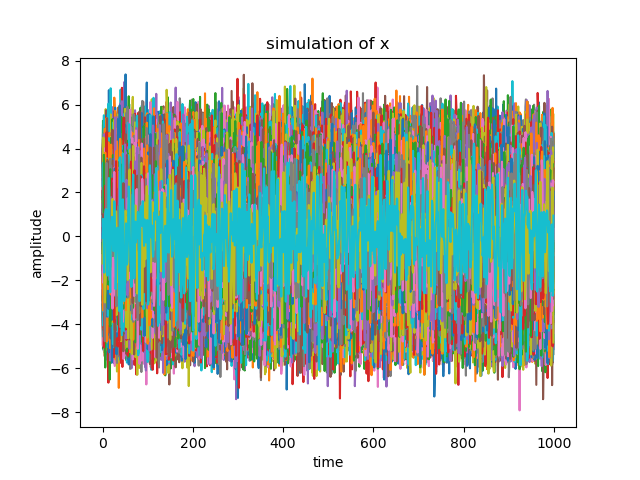

In [28]:
plt.figure()
for i in range(0, point, 1):
    plt.plot(x[i])
plt.title('simulation of x')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.show()

<IPython.core.display.Javascript object>


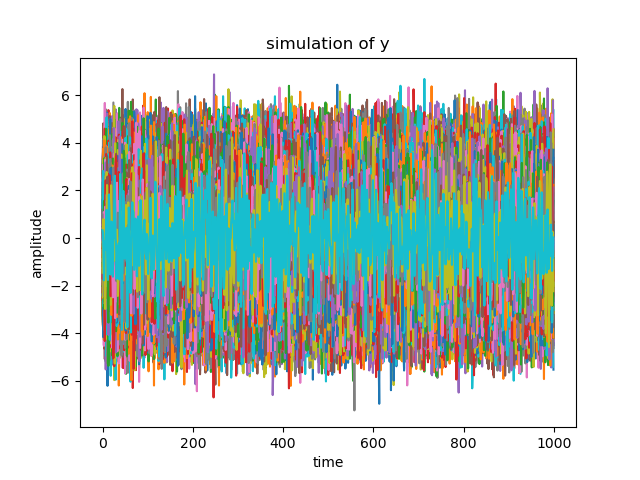

In [34]:
plt.figure()
for i in range(0, point, 1):
    plt.plot(y[i])
plt.title('simulation of y')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.show()

Fourier transfrom of the first series. 

<b>NOTE:</b> the time step of sampling the series is 1 because the generated series produces its value at the time step of 1. Refer to the code's comment to identify the time step.  

<IPython.core.display.Javascript object>


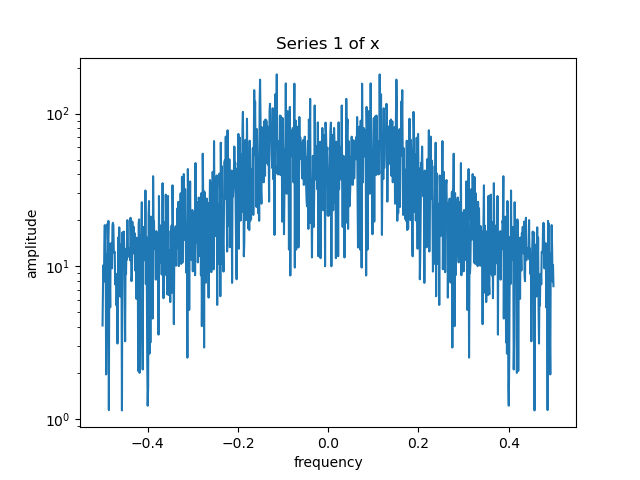

In [35]:
fxy = fft(x[0])
fxx = fftfreq(time, d=1) #timestep (d) is set to 1 because signal is generated with the timestep of 1. 
fxylol = rfft(x[0])
fxxlol = rfftfreq(time, d=1)

plt.figure()
plt.plot(fftshift(fxx), np.abs(fftshift(fxy)))
plt.yscale('log')
plt.title('Series 1 of x')
plt.xlabel('frequency')
plt.ylabel('amplitude')
#plt.xlim(0)
plt.show()

Inverse fourier transform of the series and compare with the original (checking purpose). 

<IPython.core.display.Javascript object>


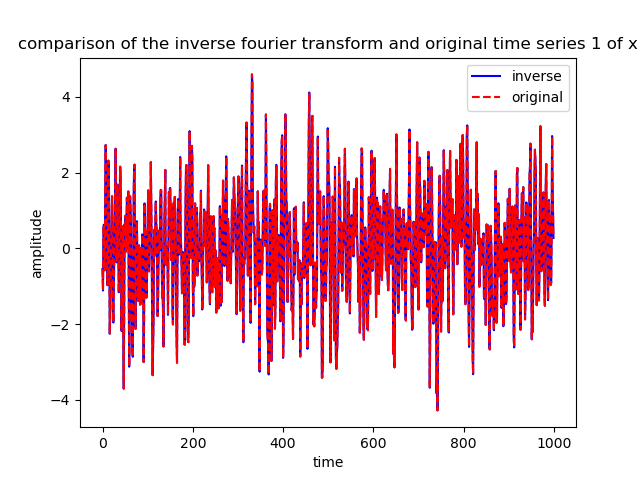

In [37]:
xnew = ifft(fxy)
plt.figure()
plt.plot(np.real(xnew), 'b-', label='inverse')
plt.plot(x[0], 'r--', label='original')
plt.ylabel('amplitude')
plt.xlabel('time')
plt.legend(loc='best')
plt.title('comparison of the inverse fourier transform and original time series 1 of x')
plt.show()

Fourier transform for nth generated time series. 

<IPython.core.display.Javascript object>


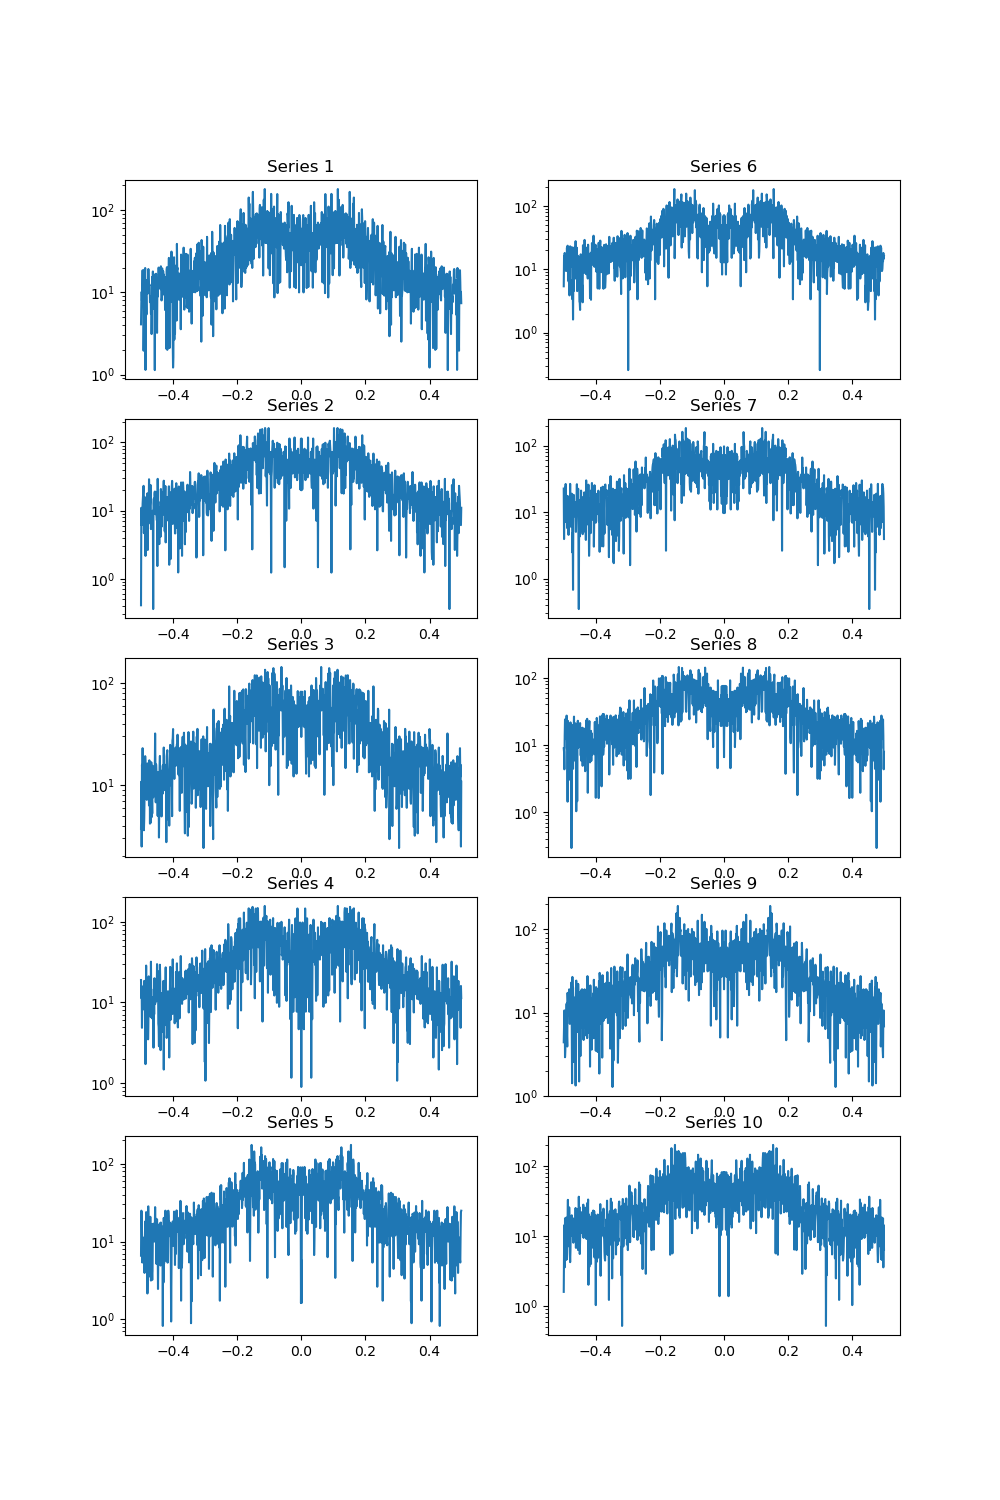

In [39]:
row = 5
col = 2

fig, ax = plt.subplots(row, col, figsize=(10, 15))
j=0
for i in range(0, (row*col), 1):
    fxy = fft(x[i])
    fxx = fftfreq(time, d=1)
    
    newi = i%row
    if newi==0:
        j=j+1
    newj = j-1
    ax[newi][newj].plot(fftshift(fxx), np.abs(fftshift(fxy)))
    ax[newi][newj].set_yscale('log')
    ax[newi][newj].set_title(f'Series {i+1}')
    #ax[newi][newj].set_xlabel('frequency')
    #ax[newi][newj].set_ylabel('amplitude')
plt.show()

Combine all the result of the fourier transform into one graph. 

<IPython.core.display.Javascript object>


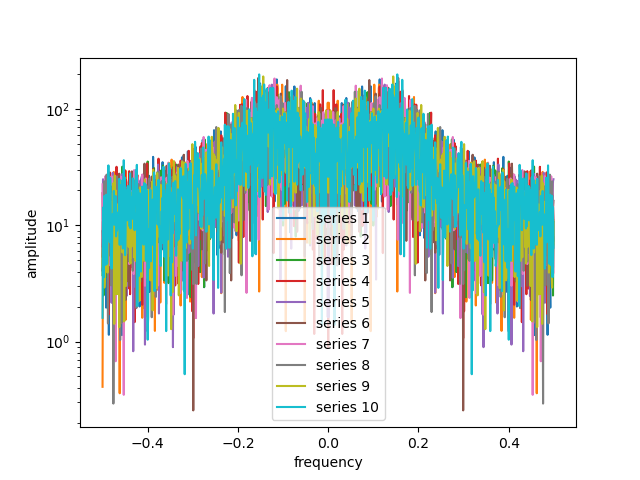

In [40]:
plt.figure()
for i in range(0, (row*col), 1):
    fxy = fft(x[i])
    fxx = fftfreq(time, d=1)
    plt.plot(fftshift(fxx), np.abs(fftshift(fxy)), label=f'series {i+1}')
plt.legend(loc='best')
plt.yscale('log')
plt.xlabel('frequency')
plt.ylabel('amplitude')
plt.show()

# Granger causality calculation

The code is copied from the period work. Reader may click on <a href='https://github.com/sajtarius/practice/blob/main/reproduce_granger1.ipynb'>this</a> to know more. 

In [24]:
#covariance matrix
sigma11 = 1.0
sigma12 = 0.4
sigma21 = sigma12 
sigma22 = 0.7
matCov = np.array([[sigma11, sigma12],[sigma21, sigma22]])

const = 2j*np.pi
point = 1_000
x = np.linspace(0, point, point)
x1 = abs(x)
spectx = []
specty = []
spectxy = []
spectyx = []
anscoh = []
inter = []
anscyx = []
anscxy = []
ansinst = []

for i in x: 
    #matrix A
    #i=1/i
    a = 1 - 0.9*np.exp(-i*const) + 0.5*np.exp(-2*i*const)
    b = 0 
    c = -0.16*np.exp(-i*const) + 0.2*np.exp(-2*i*const)
    d = 1 - 0.8*np.exp(-i*const) + 0.5*np.exp(-2*i*const)
    
    matA = np.array([[a, b],[c, d]])
    detA = np.linalg.det(matA)
    
    #matrix H
    hxx = d/detA
    hxy = -b/detA
    hyx = -c/detA
    hyy = a/detA
    
    matH = np.array([[hxx, hxy],[hyx, hyy]])
    matHs = np.transpose(np.array([[np.conj(hxx), np.conj(hxy)],[np.conj(hyx), np.conj(hyy)]]))
    
    s = np.dot(np.dot(matH, matCov), matHs) #spectrum matrix 
    
    spectx.append(s[0][0])
    specty.append(s[1][1])
    spectxy.append(s[0][1])
    spectyx.append(s[1][0])
    
    #coherence equation 17
    coh = (s[0][1]*s[1][0])/(s[0][0]*s[1][1])
    lol = -np.log(1-coh)
    anscoh.append(coh)
    
    #interdependence
    f = np.log((s[0][0]*s[1][1])/(np.linalg.det(s)))
    inter.append(f)
    
    #causal y to x
    dhxx = hxx + sigma12/sigma11*hxy
    dhxy = hxy 
    dhyx = hyx + sigma12/sigma11*hyy
    dhyy = hyy 
    cyx = np.log((s[0][0])/(dhxx*sigma11*np.conj(dhxx)))
    anscyx.append(cyx)
    
    #causal x to y 
    hhyy = hyy + sigma12/sigma22*hyx
    cxy = np.log((s[1][1])/(hhyy*sigma22*np.conj(hhyy)))
    anscxy.append(cxy)
    
    #instantaneous causal of x and y
    inst_cau = np.log(((dhxx*sigma11*np.conj(dhxx))*(hhyy*sigma22*np.conj(hhyy)))/(np.linalg.det(s)))
    ansinst.append(inst_cau)

<IPython.core.display.Javascript object>


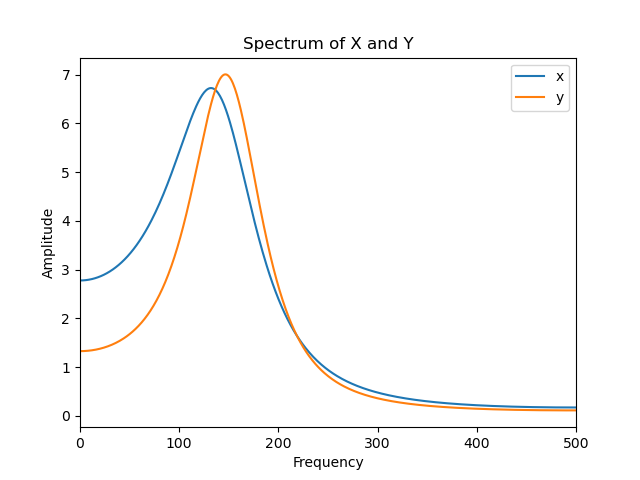

In [25]:
plt.figure()
plt.plot(x, abs(np.array(spectx)), label='x')
plt.plot(x, abs(np.array(specty)), label='y')
plt.legend(loc='best')
plt.xlim(np.min(x), np.max(x)/2)
plt.title('Spectrum of X and Y')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()
